In [1]:
import matplotlib.pyplot as plt
import mpq
import numpy as np
import os

import config
from scenario import *
from tileset import Tileset

In [2]:
scenarios = []
scenarios += process_scenarios(os.path.join(config.STARCRAFT_ROOT, 'Maps'))
for directory in config.MAP_DIRECTORIES:
    scenarios += process_scenarios(directory)

In [3]:
four_player_jungle_scenarios = [x for x in scenarios if x.human_players == 4 and x.tileset == Tileset.JUNGLE and x.width == 128 and x.height == 128]

In [4]:
%matplotlib inline

In [5]:
def get_height_map(tile):

    @np.vectorize
    def minitile_heights(minitile):
        return minitile.height

    @np.vectorize
    def minitile_walkability(minitile):
        return minitile.walkable

    return np.average(minitile_heights(tile.minitiles)) + \
           np.average(minitile_walkability(tile.minitiles) * 0.5) + \
           tile.buildable * 0.2 + 0.0001

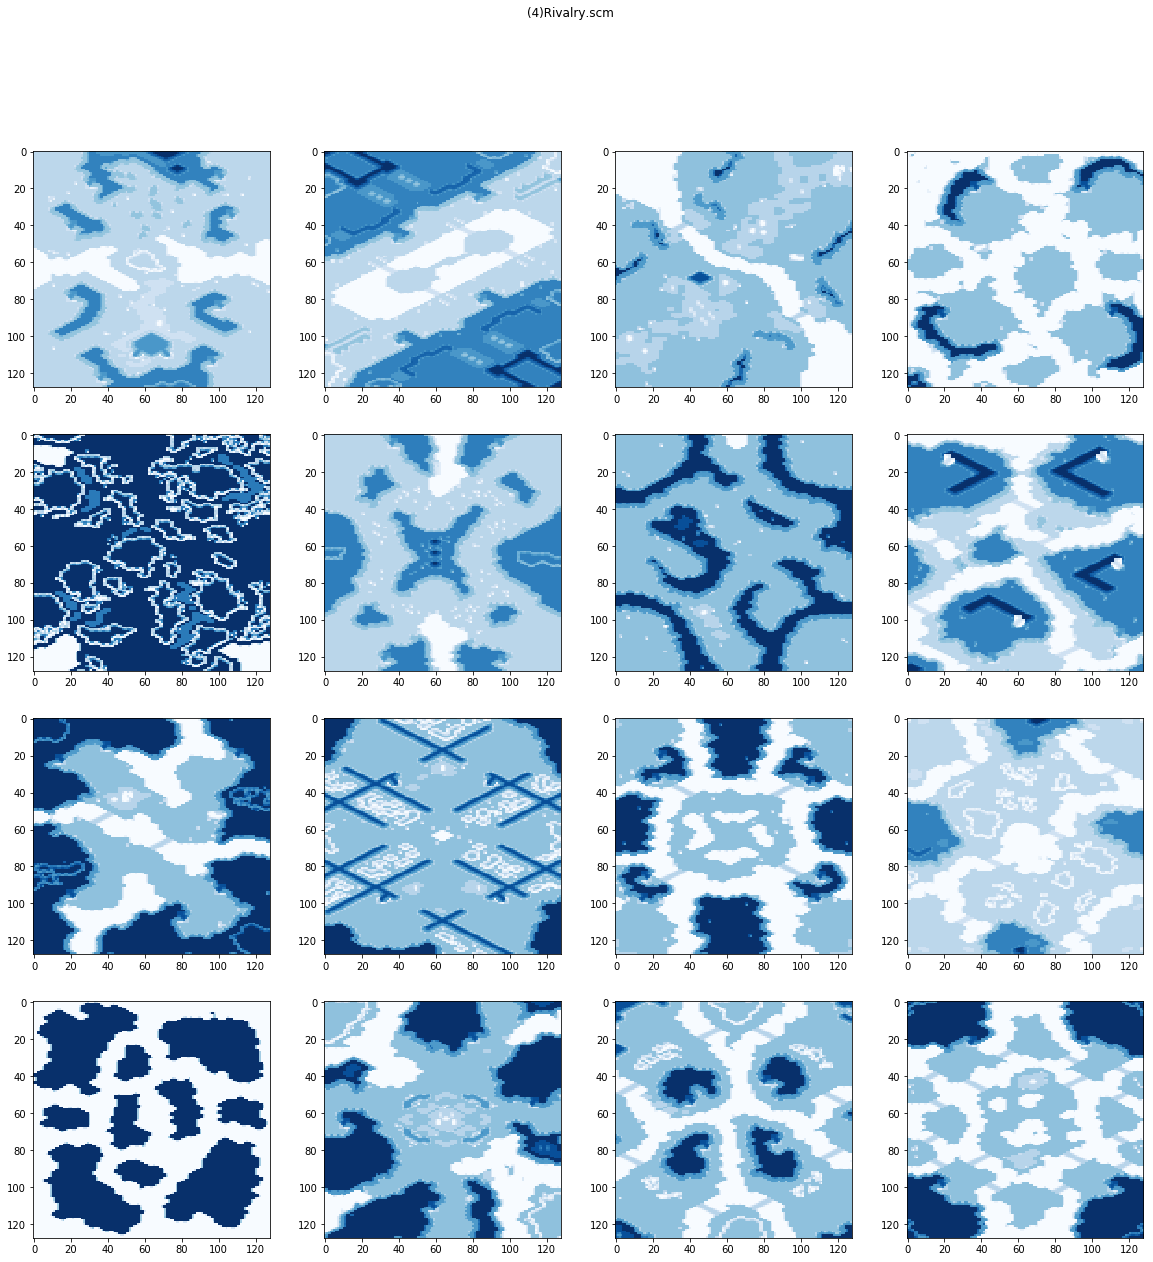

In [6]:
plt.figure(figsize=(20, 20))

for i in range(16):
    scenario = four_player_jungle_scenarios[i]
    height_map = np.vectorize(get_height_map)(scenario.tiles)

    plt.subplot(4, 4, i + 1)
    plt.suptitle(scenario.filename)
    plt.imshow(height_map, cmap=plt.cm.Blues)

plt.show()